#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler


#### Reading Dataset

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')
print(df.shape)
df.head()

(693071, 57)


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [3]:
# droppping all date and time columns and dropping id columns as its aunique udentifier column
df.drop(['id','timestamp','hour','day','month','datetime','timezone'],inplace=True,axis=1)
df.shape

(693071, 50)

#### Checking for null values

In [4]:
df.isnull().mean()*100

source                         0.000000
destination                    0.000000
cab_type                       0.000000
product_id                     0.000000
name                           0.000000
price                          7.949402
distance                       0.000000
surge_multiplier               0.000000
latitude                       0.000000
longitude                      0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
long_summary                   0.000000
precipIntensity                0.000000
precipProbability              0.000000
humidity                       0.000000
windSpeed                      0.000000
windGust                       0.000000
windGustTime                   0.000000
visibility                     0.000000
temperatureHigh                0.000000
temperatureHighTime            0.000000
temperatureLow                 0.000000
temperatureLowTime             0.000000


### Missing value imputation

In [5]:
df['price'] = df['price'].fillna(df.price.median())
df.price.isnull().sum()

0

#### Fetching all the categorical columns

In [6]:
categorical_cols = [feature for feature in df.columns if df[feature].dtypes == 'O']
categorical_cols

['source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']

#### Fetching all numerical columns

In [7]:
numerical_cols = df.select_dtypes(include = ['int64','float64']).columns
numerical_cols

Index(['price', 'distance', 'surge_multiplier', 'latitude', 'longitude',
       'temperature', 'apparentTemperature', 'precipIntensity',
       'precipProbability', 'humidity', 'windSpeed', 'windGust',
       'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime',
       'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh',
       'apparentTemperatureHighTime', 'apparentTemperatureLow',
       'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime',
       'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime',
       'temperatureMin', 'temperatureMinTime', 'temperatureMax',
       'temperatureMaxTime', 'apparentTemperatureMin',
       'apparentTemperatureMinTime', 'apparentTemperatureMax',
       'apparentTemperatureMaxTime'],
      dtype='object')

### Categorical columns Treatment

In [8]:
for feature in categorical_cols:
    print(f'{feature} = {df[feature].value_counts().count()}')

source = 12
destination = 12
cab_type = 2
product_id = 13
name = 13
short_summary = 9
long_summary = 11
icon = 7


In [9]:
df['source'].value_counts()

Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64

In [10]:
# Since both souce and destination are same so we ca drop one
df.drop('destination',inplace=True,axis=1)
df.shape

(693071, 49)

In [11]:
for feature in ['product_id','name','short_summary','long_summary','source','icon']:
    df[feature] = LabelEncoder().fit_transform(df[feature])

In [12]:
# cab type has 2 columns so one hot encoding is performed
dummy = pd.get_dummies(df['cab_type'],prefix='cab_type')
df.drop('cab_type',inplace=True,axis=1)
df = pd.concat([df,dummy],axis=1)
df.head()

,source,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,cab_type_Lyft,cab_type_Uber
0,5,8,7,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,...,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000,1,0
1,5,12,2,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,...,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600,1,0
2,5,7,5,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,...,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000,1,0
3,5,10,4,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,...,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800,1,0
4,5,11,6,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,...,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800,1,0


### Numerical Columns Treatment

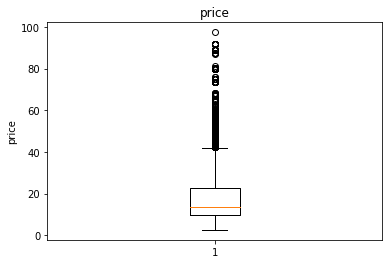

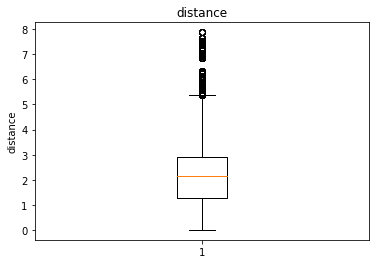

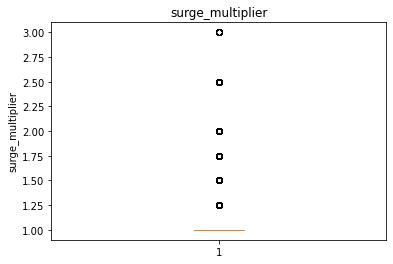

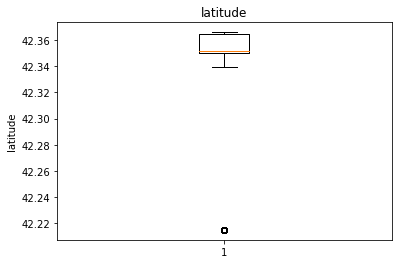

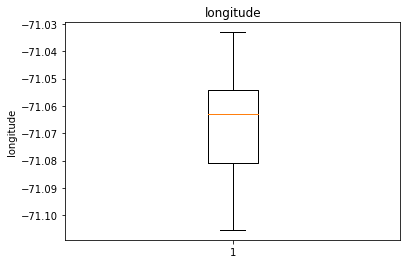

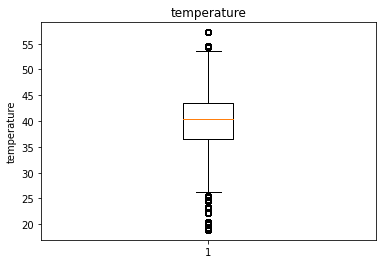

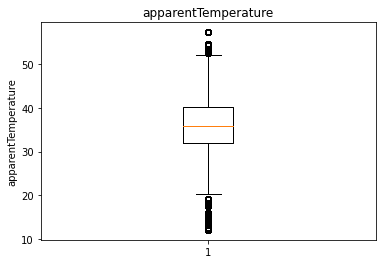

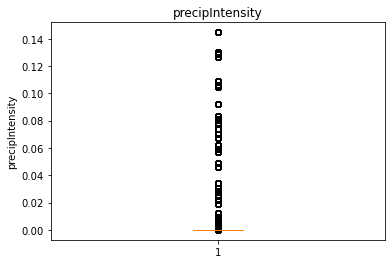

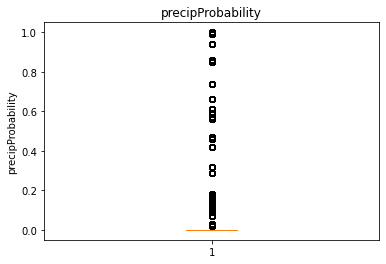

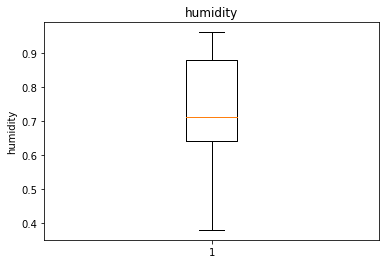

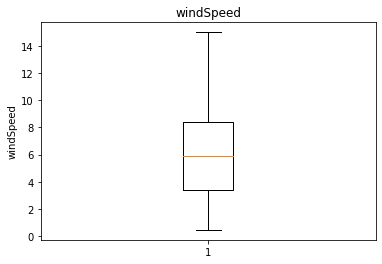

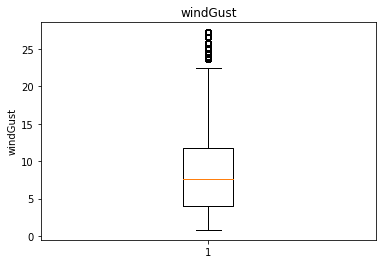

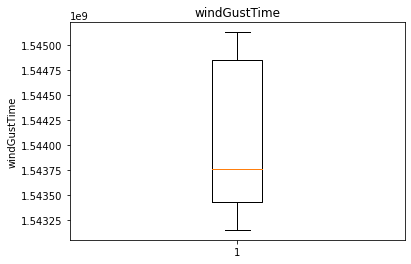

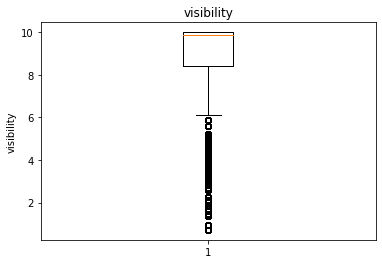

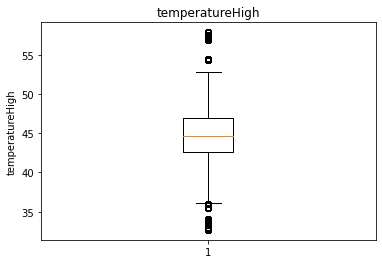

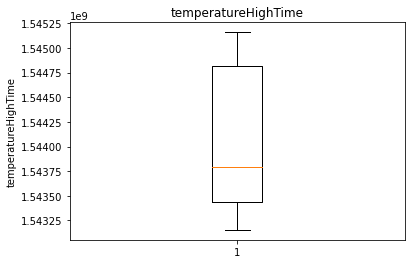

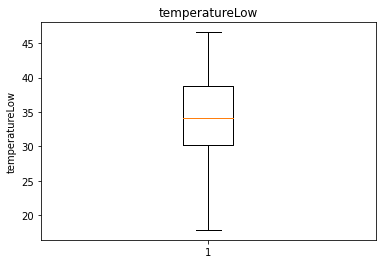

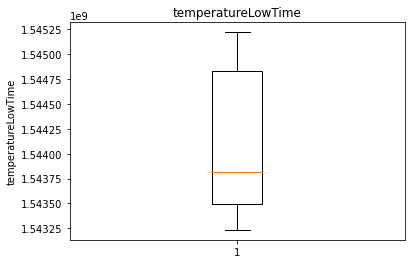

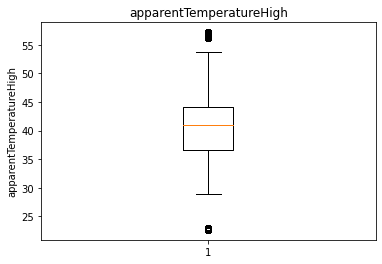

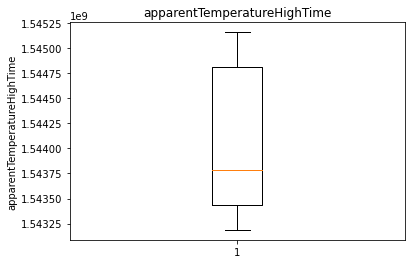

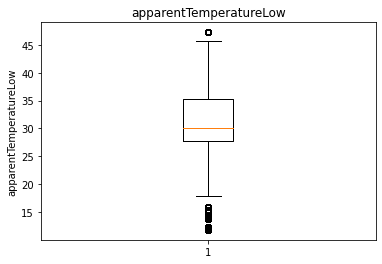

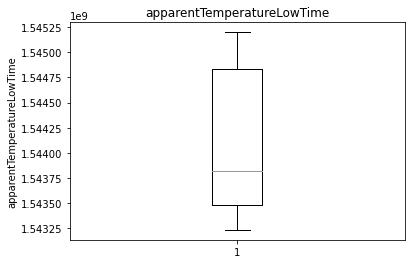

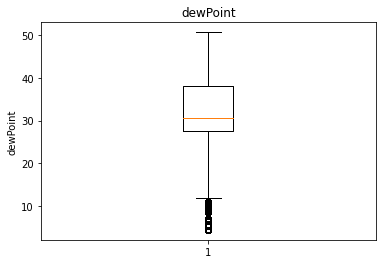

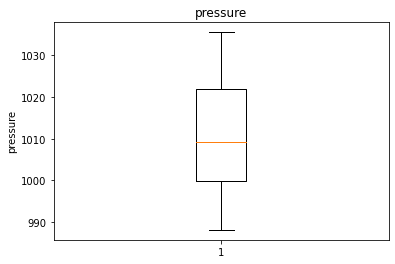

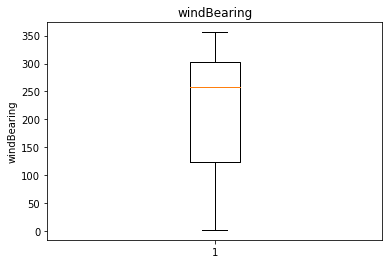

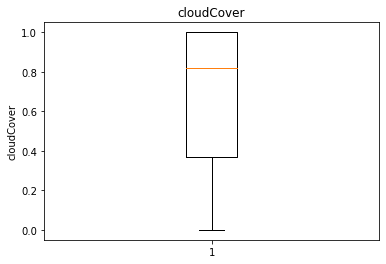

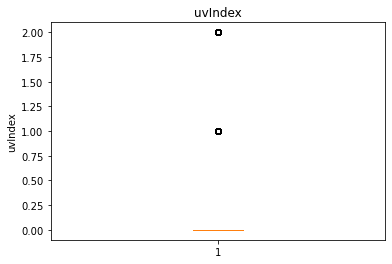

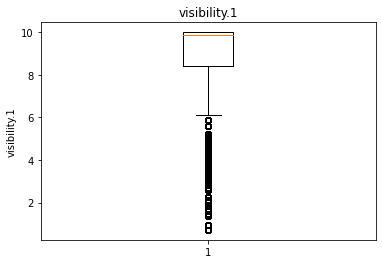

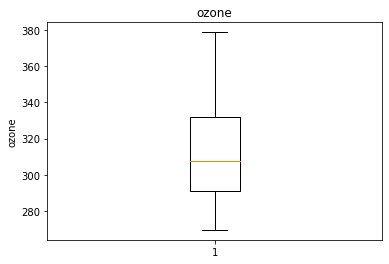

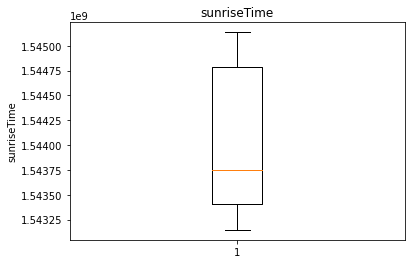

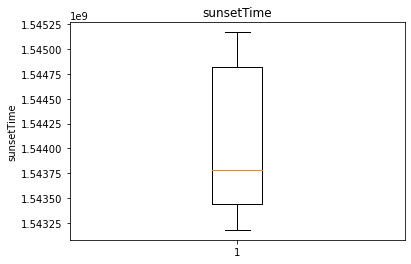

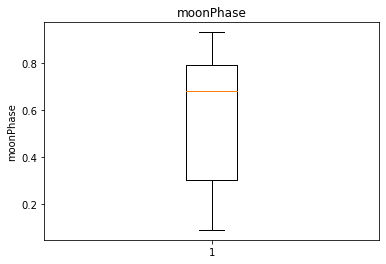

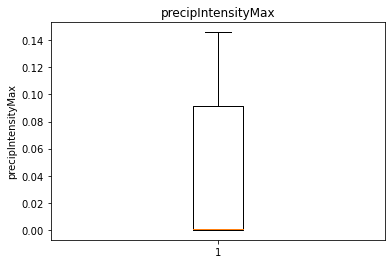

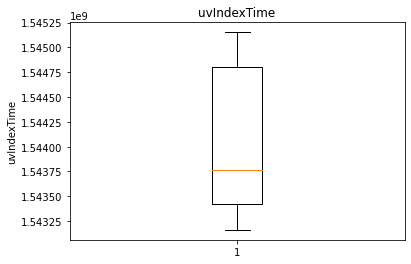

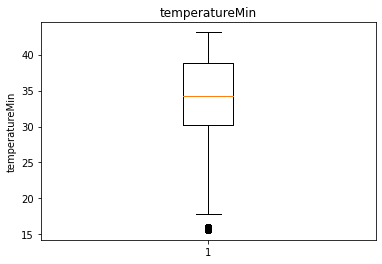

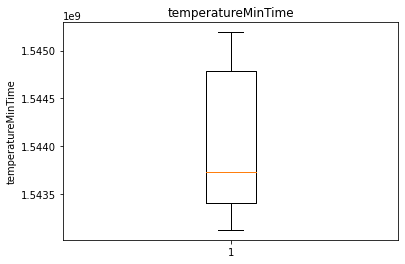

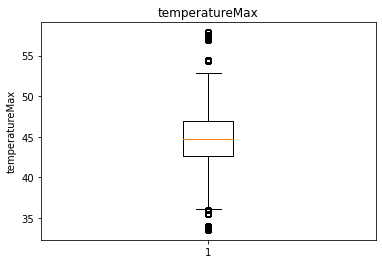

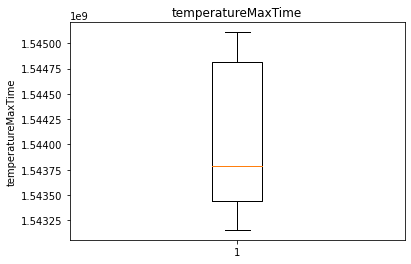

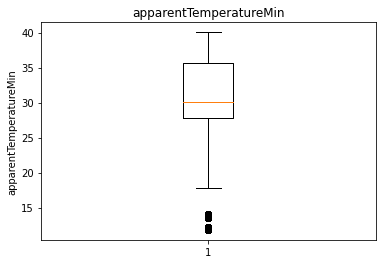

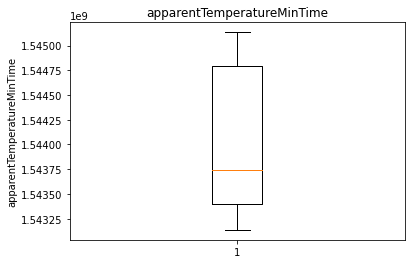

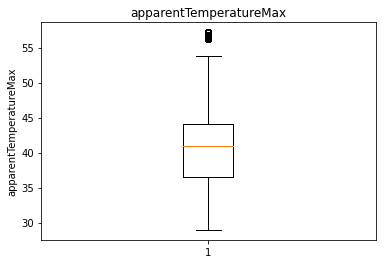

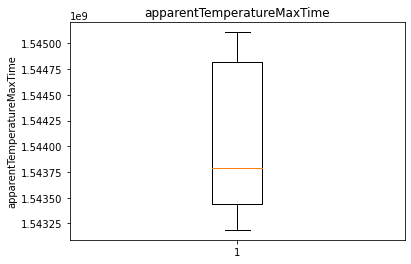

In [13]:
# checking outliers
for feature in numerical_cols:
    plt.boxplot(x=df[feature])
    plt.title(feature)
    plt.ylabel(feature)
    plt.show()

In [14]:
df['surge_multiplier'].unique()

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

In [15]:
df['surge_multiplier'].value_counts()

1.00    672096
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

In [16]:
# longitude

In [17]:
df['precipIntensity'].describe()
# preciProbability

count    693071.000000
mean          0.008922
std           0.026901
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.144700
Name: precipIntensity, dtype: float64

### Checking number of outliers

In [18]:
outlier_cols = []
for feature in numerical_cols:
    count=0
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower = df[feature].quantile(0.25) - (1.5*IQR)
    higher = df[feature].quantile(0.75) + (1.5*IQR)
    l = df[feature][df[feature] < lower].count()
    h = df[feature][df[feature] > higher].count()
    if l >1 or h >1:
        outlier_cols.append(feature)
        print(l+h , feature)

7982 price
8662 distance
20975 surge_multiplier
88546 latitude
36659 temperature
53507 apparentTemperature
150828 precipIntensity
150828 precipProbability
16848 windGust
136839 visibility
163878 temperatureHigh
71604 apparentTemperatureHigh
87672 apparentTemperatureLow
37283 dewPoint
159407 uvIndex
136839 visibility.1
4447 temperatureMin
137046 temperatureMax
76050 apparentTemperatureMin
44772 apparentTemperatureMax


## Outliers imputation

In [19]:
for feature in outlier_cols:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_range = df[feature].quantile(0.25) - (1.5*IQR)
    higher_range = df[feature].quantile(0.75) + (1.5*IQR)
    lower = df[feature].quantile(0.25)
    higher = df[feature].quantile(0.75)
    outlier_treated = np.where(df[feature] > higher_range, higher,df[feature])
    df[feature] = pd.DataFrame(outlier_treated)
    outlier_treated = np.where(df[feature] < lower_range , lower, df[feature])
    df[feature] = pd.DataFrame(outlier_treated)
    

## Outlier treatment Verification

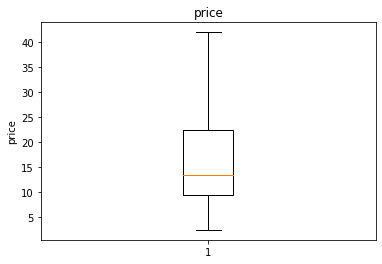

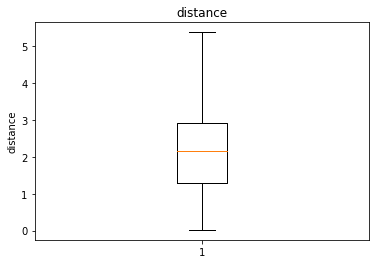

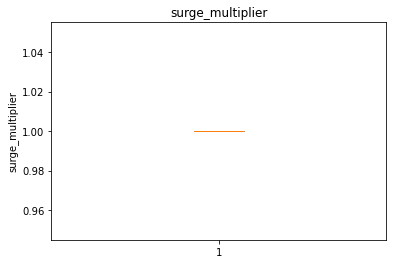

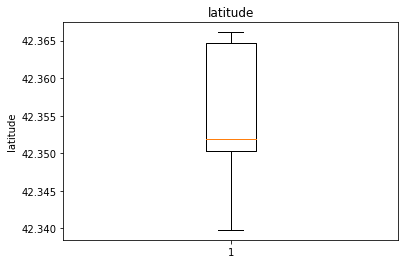

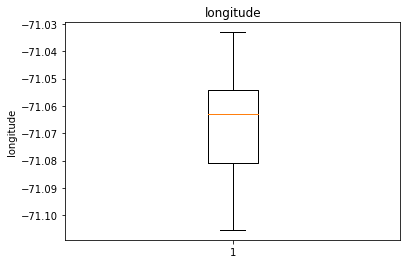

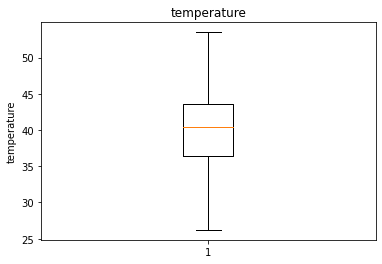

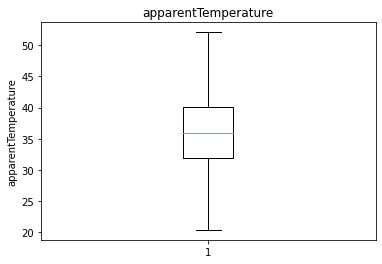

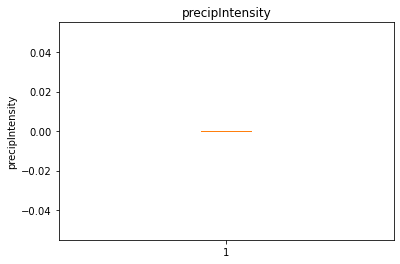

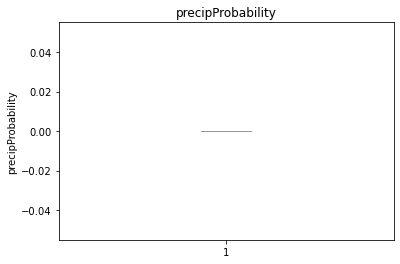

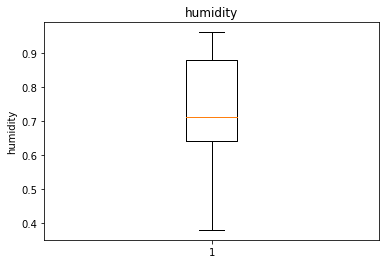

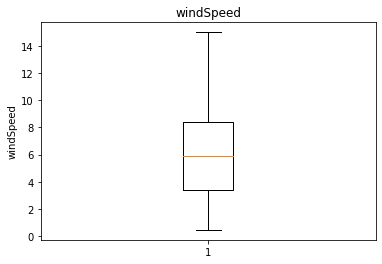

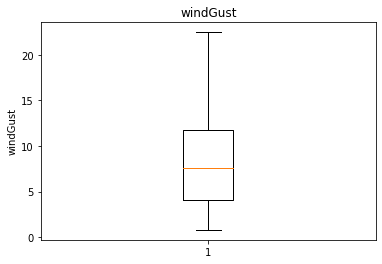

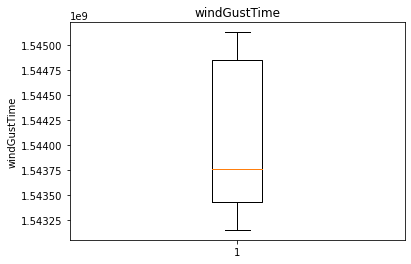

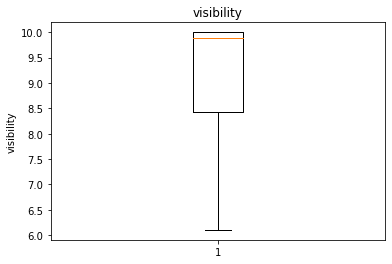

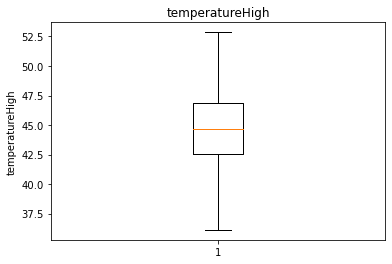

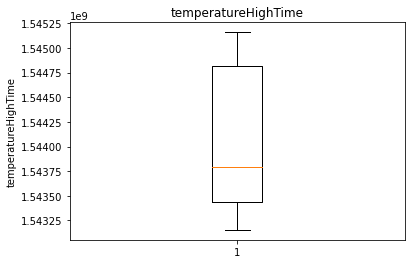

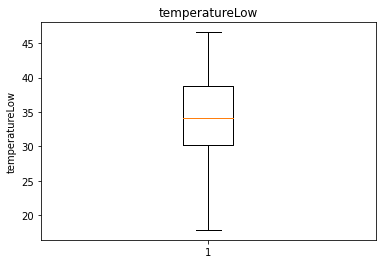

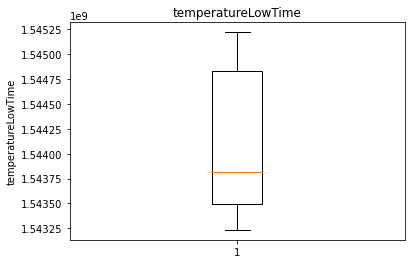

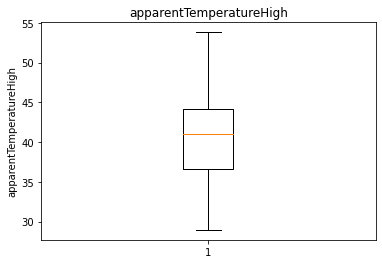

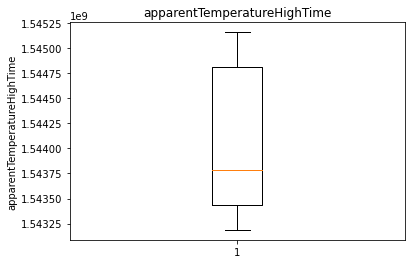

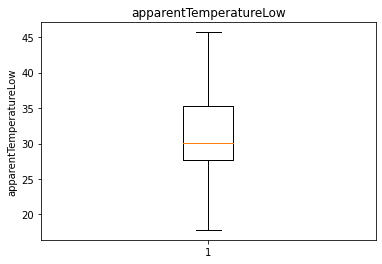

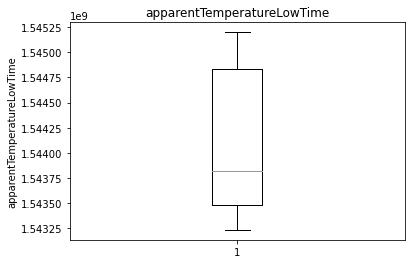

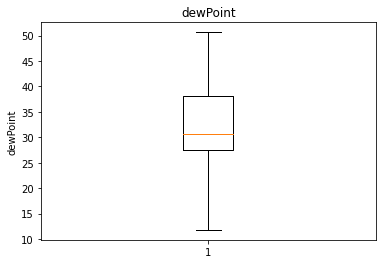

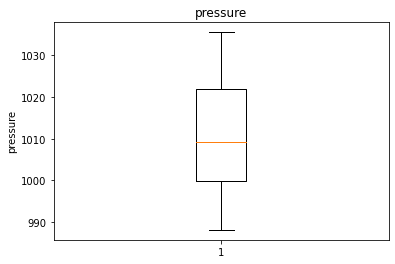

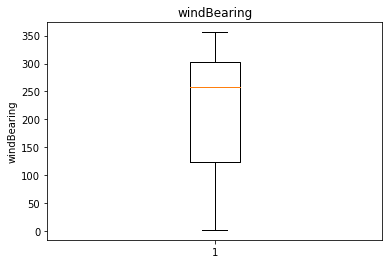

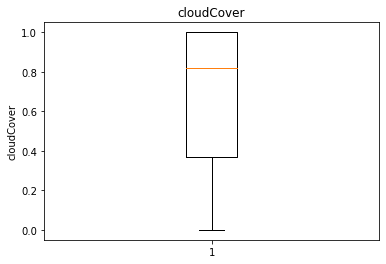

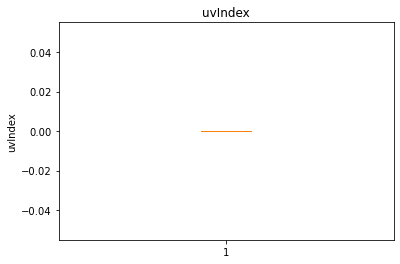

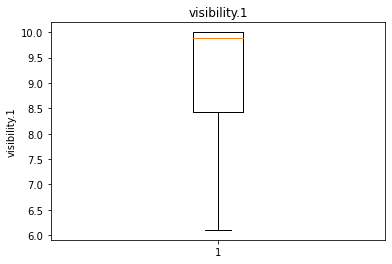

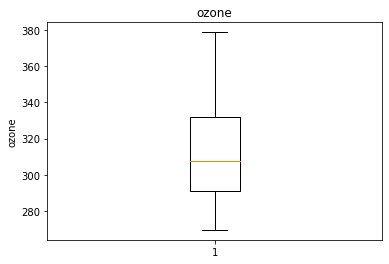

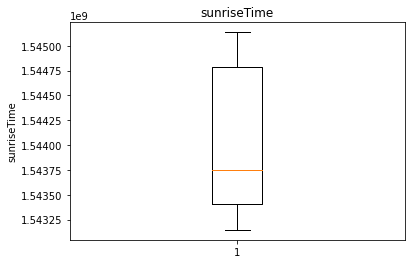

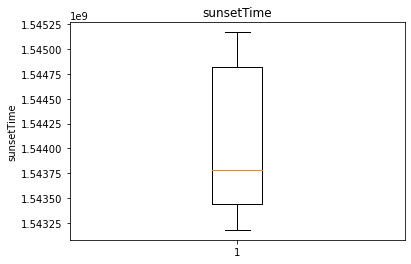

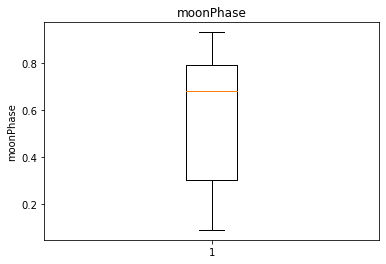

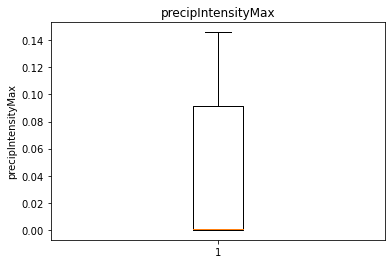

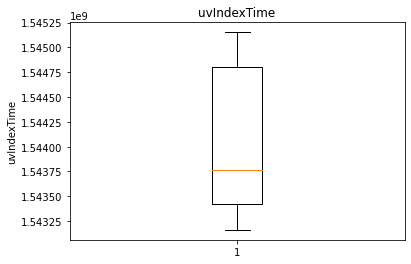

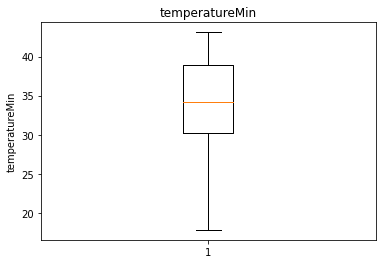

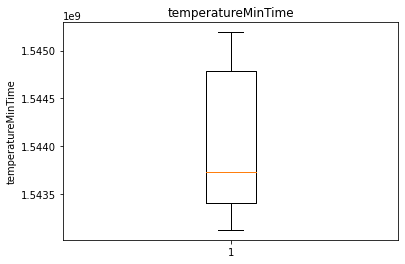

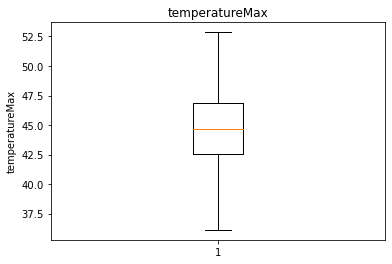

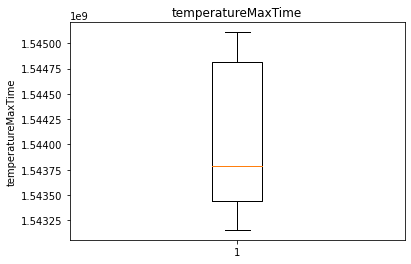

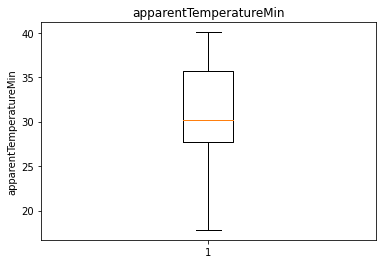

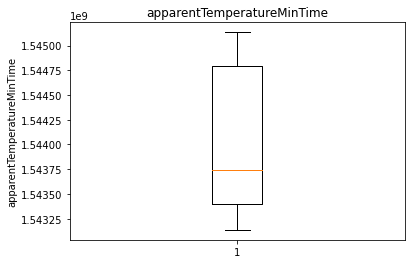

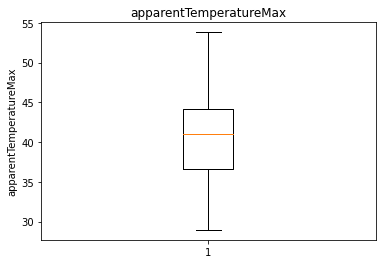

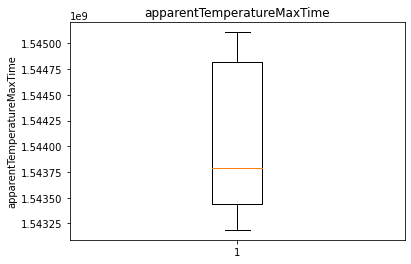

In [20]:
for feature in numerical_cols:
    plt.boxplot(x=df[feature])
    plt.title(feature)
    plt.ylabel(feature)
    plt.show()

In [21]:
df['surge_multiplier'].unique()

array([1.])

In [22]:
df['precipIntensity'].unique()

array([0.])

In [23]:
df['precipProbability'].unique()

array([0.])

In [24]:
df['uvIndex'].unique()

array([0.])

### Since each columns has only one unique value so it can be dropped

In [25]:
df.drop(['surge_multiplier','precipIntensity','precipProbability','uvIndex'],inplace=True,axis=True)
df.shape

(693071, 46)

### Normalization and standardization

In [26]:
#data = MinMaxScaler().fit_transform(df[df.columns])

In [27]:
#data

In [28]:
#result_df = pd.concat([df,pd.DataFrame(MinMaxScaler().fit_transform(df[df.columns]),columns = df.columns)],axis=1)

In [29]:
#result_df

,source,product_id,name,price,distance,latitude,longitude,temperature,apparentTemperature,short_summary,...,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,cab_type_Lyft,cab_type_Uber
0,5,8,7,5.0,0.44,42.3503,-71.0330,42.34,37.12,4,...,0.872871,0.913043,0.451613,0.928177,0.715572,0.938739,0.366854,0.921348,1.0,0.0
1,5,12,2,11.0,0.44,42.3503,-71.0330,43.58,37.35,8,...,0.896634,0.053913,0.667861,0.049724,0.826733,0.077477,0.602172,0.033708,1.0,0.0
2,5,7,5,7.0,0.44,42.3503,-71.0330,38.33,32.93,0,...,0.693465,0.123478,0.682796,0.084715,0.594509,0.120721,0.610217,0.069288,1.0,0.0
3,5,10,4,26.0,0.44,42.3503,-71.0330,34.38,29.63,0,...,0.666139,0.206957,0.532258,0.182320,0.561206,0.207207,0.385358,0.168539,1.0,0.0
4,5,11,6,9.0,0.44,42.3503,-71.0330,37.44,30.88,6,...,0.603960,0.135652,0.362007,0.136280,0.507651,0.127928,0.273532,0.121723,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,11,3,11,13.0,1.00,42.3519,-71.0643,37.05,37.05,6,...,0.537426,0.259130,0.516129,0.274401,0.447345,0.261261,0.609010,0.262172,0.0,1.0
693067,11,0,10,9.5,1.00,42.3519,-71.0643,37.05,37.05,6,...,0.537426,0.259130,0.516129,0.274401,0.447345,0.261261,0.609010,0.262172,0.0,1.0
693068,11,4,8,13.5,1.00,42.3519,-71.0643,37.05,37.05,6,...,0.537426,0.259130,0.516129,0.274401,0.447345,0.261261,0.609010,0.262172,0.0,1.0
693069,11,2,1,27.0,1.00,42.3519,-71.0643,37.05,37.05,6,...,0.537426,0.259130,0.516129,0.274401,0.447345,0.261261,0.609010,0.262172,0.0,1.0
